In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 设置中文显示
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 1. 读取数据

In [3]:
# 读取csv 文件并指定数据类型呢
file_path = '../../data/周一所获数据/所有学员的IP使用情况.csv'
df = pd.read_csv(file_path, dtype={'_id': 'string', 'ipCount': 'int'})

# 将 'ips' 字段转换为数组类型 
df['ips'] = df['ips'].apply(lambda x: x.split(','))
# 查看数据, 'ips' 字正常显示为数组类型
df.loc[0, 'ips']
df.shape

(11211, 3)

# 2. 数据清洗
类型转换在读取 csv 文件时已经完成，这里不需要再次转换。
### (1) 单位转换
无需单位转换

### (2) 排序
已有序

### (3) 聚合
按照 `ipCount` 进行聚合

In [4]:
df = df.drop(df.columns[2], axis=1)
df.shape

(11211, 2)

In [5]:
df_grouped = (df.groupby('ipCount')
              .agg(ipUsed=('ipCount', 'mean'), RepeatCount=('ipCount', 'count'))
              # .sort_values(by='ipUsed', ascending=False)
              )

In [6]:
# 中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

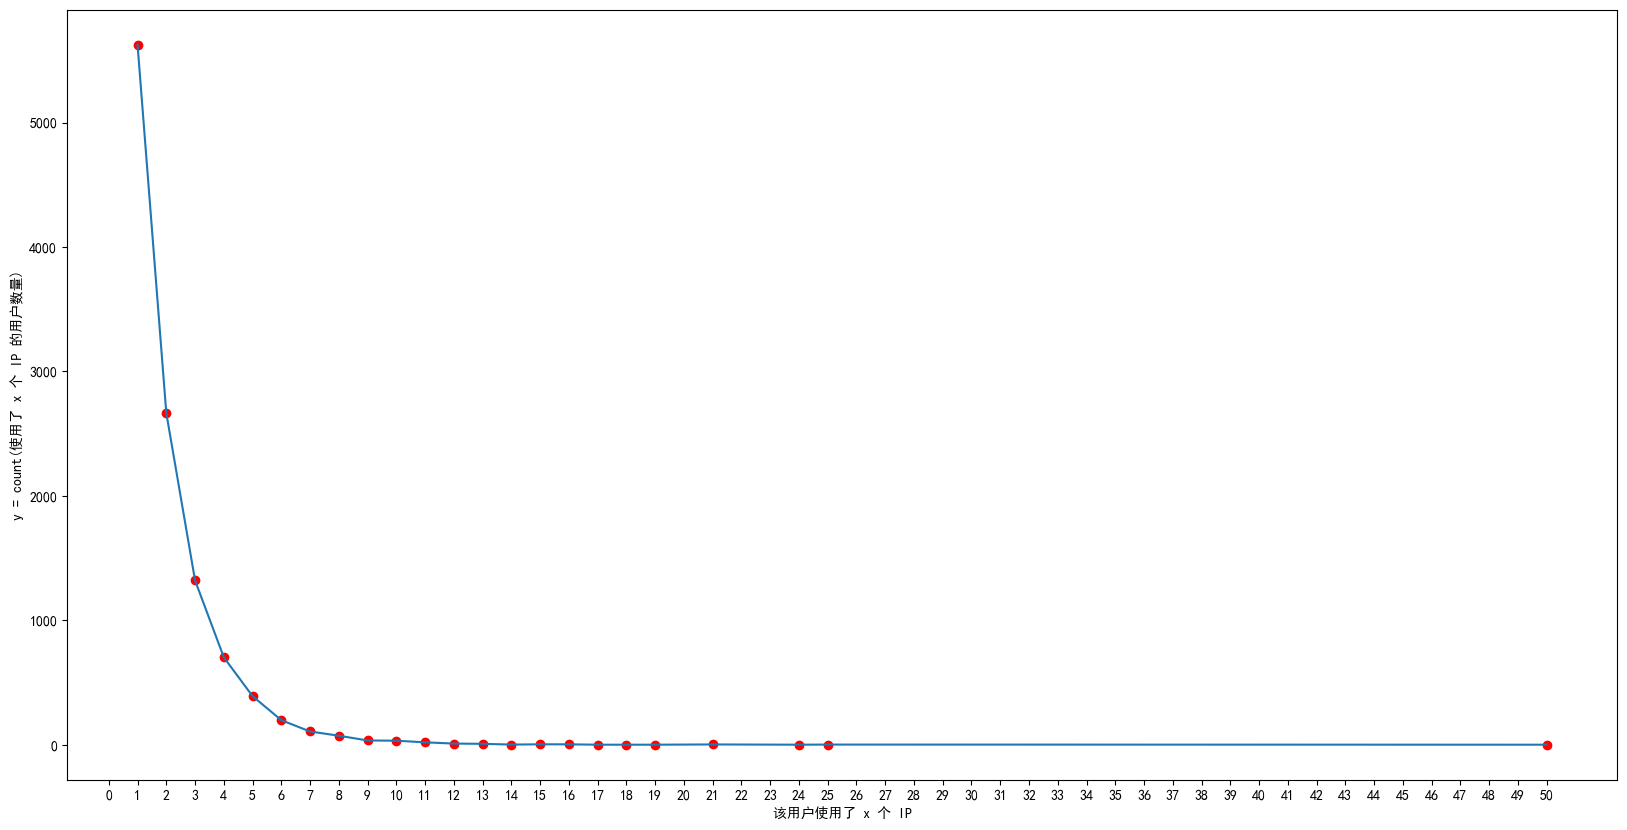

In [7]:
# 要求图表中只有 1 行 1 列子图，并且设置图表的大小为 10 * 10
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

# 设置标题
ax.set_xlabel('该用户使用了 x 个 IP')
ax.set_ylabel('y = count(使用了 x 个 IP 的用户数量)')

ax.plot(df_grouped.iloc[:, 0],
        df_grouped.iloc[:, 1])
ax.scatter(df_grouped.iloc[:, 0],
           df_grouped.iloc[:, 1],
           color='red')

# 设置刻度精度
ticks = np.arange(0, 51, 1)
labels = [f"{t}" for t in ticks]
plt.xticks(ticks, labels)

# plt.yticks(ticks=np.arange(0,df_grouped.shape[0],500),
#            labels=[f"{t}" for t in ticks])


# plt.savefig('imgs/使用了 x 个 IP 的学生人数.png', dpi=800, bbox_inches='tight', pad_inches=1)
plt.show()

In [13]:
idx1 = [i for i in range(21,0,-2)]
idx2 = [i for i in range(0,22,2)]
idx = idx1+idx2

In [14]:
# 按照原有 Dataframe 的列构造一个空 DateFrame 实例
df_norm = pd.DataFrame(columns=df_grouped.columns)

In [15]:
for i in idx:
    df.norm = df_norm._append(df_grouped.iloc[i,:],ignore_index=True)

C:\Users\fjhb\AppData\Local\Temp\ipykernel_21552\1358129880.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.norm = df_norm._append(df_grouped.iloc[i,:],ignore_index=True)
